In [1]:
# Automatically reloads imported files: this is not done manually by ipynb; this magic command tells the compiler that each time we update an imported file we want to reload it
%load_ext autoreload
# Reload all modules before executing code
%autoreload 2

#change
#temp

In [2]:
import sys,os

sys.path.append(os.getcwd())



In [3]:
import tensorflow as tf 

tf.__version__

'2.19.0'

In [4]:
#Spip list | grep tensorflow
import sys,os
sys.path.append(os.getcwd())
from main import DL


c:\Users\Hikaru Kurosawa\Documents\GitHub\gtxDLPythonCode\DataImport.py:473: SyntaxWarning: invalid escape sequence '\L'
  loadFile = input('Enter the general and specific directory (e.g. meshLRTests\\\LR2e-5) pertaining to the .h5 (weights) file you would like to load: ')


In [5]:
test = DL()

In [ ]:
test.importData(isTesting = True)

In [ ]:
test.Train()


In [ ]:
test.upload_to_S3()

In [18]:
test.load()


inside
ModelParameters/0307_3D_noise_no_dropout_at_beg/Default.keras
ModelParameters/20241116_MCX_SmallHighRes_1e7/Default6Fx_HighRes_SmallFOV.keras
ModelParameters/20241120_5xfHb_0.5xStO2_FixedRefl_MCX/Default6Fx_64x64 (1).keras
ModelParameters/20241203_CSH_2xMus_0.5xStO2/Default6Fx_64x64.keras
ModelParameters/20250108_0_5_to_solid_periphery_concentration/Default.keras
ModelParameters/20250108_u_net_with_attention_0_5_to_2_and_solid_periphery_concentration/Default.keras
ModelParameters/20250116_u_net_CSH_10000_with_protrusions_0_3/Default.keras
ModelParameters/20250122_OP_FL_attention_u_net_2D/Default.keras
ModelParameters/20250127_attention_u_net_fHb_0_5_100/Default.keras
ModelParameters/20250127_u_net_attention_fHb_5_to_60/Default.keras
ModelParameters/20250204_periphery_concentration_0_5_to_solid_fHb_0_5_to_100/Default.keras
ModelParameters/20250228_with_dropout_OP_FL_U_net/Default.keras
ModelParameters/20250301_with_randomized_crop_OP_FL_U_net_with_dropout_at_intermediate/Default.

In [ ]:
test.Plot()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

for i in range(6):
    ax = axes[i]  # Access each axis
    img_data = np.squeeze(test.FL[0, :, :, i, 0])
    img = ax.imshow(img_data,vmin=np.min(img_data), vmax=np.max(img_data), cmap='jet')  # Display the image
    ax.axis('off')  # Turn off both axes and ticks

    cbar = fig.colorbar(img, ax=ax, shrink=0.8)  # Shrink the colorbar to 80% of its size

plt.show()

<unknown>:487: SyntaxWarning: invalid escape sequence '\L'
<unknown>:487: SyntaxWarning: invalid escape sequence '\L'


True
Listing .mat files for: TestingData
TestingData//20250331_LiquidPhantomValidations/6mm_Submarine _Crop_test/DL_nImages1.mat
TestingData//20250331_LiquidPhantomValidations/6mm_Submarine_Crop_test/DL_nImages1.mat
TestingData/0250530_DT_MCX_SFDI/0250530_Tumour3_DT_comparison/DL_nImages4.mat
TestingData/0250530_DT_MCX_SFDI/0250530_Tumour3_MCX_1e8_comparison/DL_nImages4.mat
TestingData/0250530_DT_MCX_SFDI/0250530_Tumour3_MCX_1e8_comparison/DL_nImages4_padded.mat
TestingData/0250530_DT_MCX_SFDI/CT_SFDI_Combined/DL_nImages4.mat
TestingData/0250530_DT_MCX_SFDI/DT_lower_optprop/DL_nImages4.mat
TestingData/0250530_DT_MCX_SFDI/comparison_DT_MCX_SFDI_concatenated_data.mat
TestingData/1000_CSH_DTOP_4_6/DL_nImages1000.mat
TestingData/1003_nocodeshift_fordebug/DL_nImages1000 (2).mat
TestingData/1004_CSH_0_10_DTOP_1000/DL_nImages1000.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift/Parameters.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift/nImages210.mat
TestingData/1127_Mandolin_Tumours

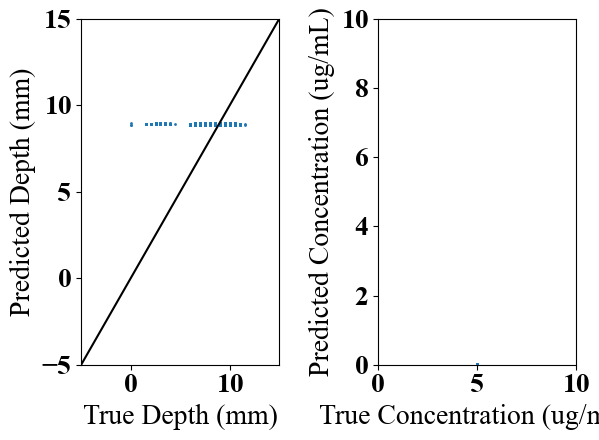

R2:  -1.1751155853271484
DF, DF pred:  1.51 8.905208


c:\Users\Hikaru Kurosawa\Documents\GitHub\gtxDLPythonCode\HelperFunc.py:414: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  min_depth_graph.show()


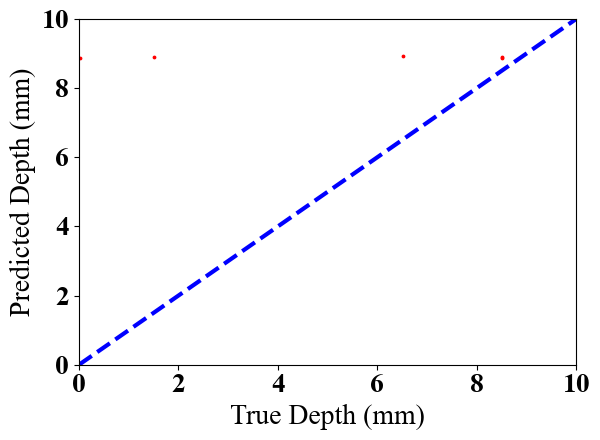

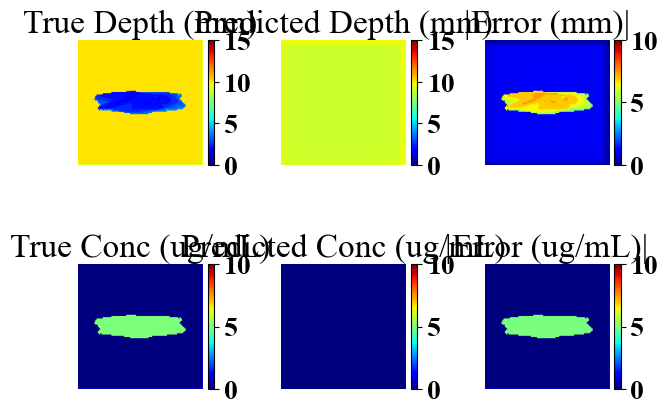

DF, DF pred:  8.51 8.911946


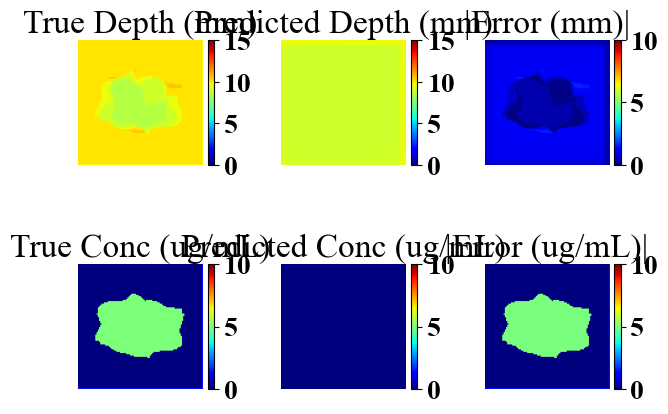

DF, DF pred:  6.51 8.922379


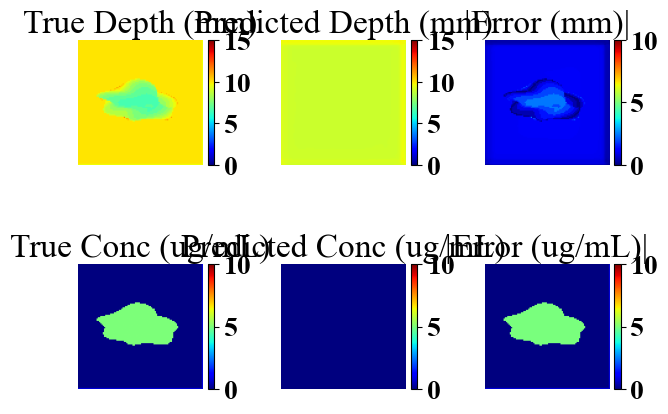

DF, DF pred:  0.01 8.8649645


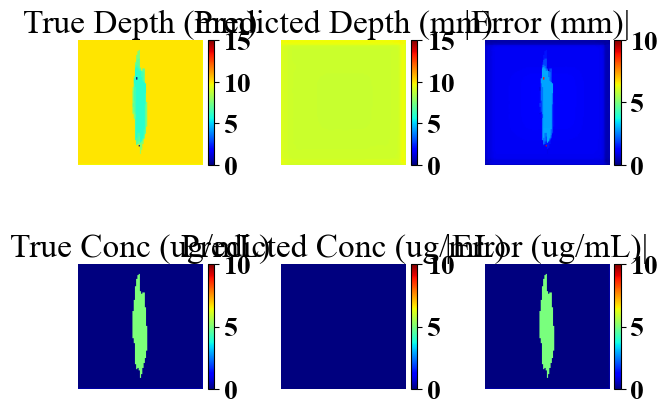

DF, DF pred:  8.51 8.866074


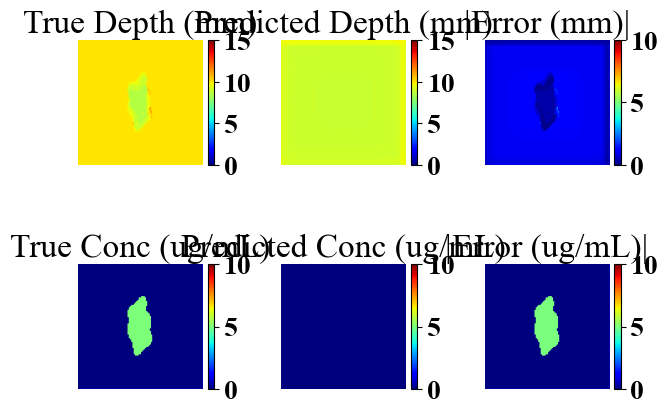

In [34]:
test.Analysis(save_image = 0)

In [ ]:
test.Analysis_auto_encoder_output(save_image = 0 )

In [ ]:
#plots RE 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

raw_RE = test.RE
save_fig = 0
save_path = os.path.join('./predictions/' + test.folder_name)
for x in range(test.RE.shape[0]):
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

    for i in range(6):
        ax = axes[i]
        img_data = np.squeeze(raw_RE[x, :, :, i])
        
        # Display image with percentile-based scaling
        img = ax.imshow(
            img_data,
            vmin=np.percentile(img_data, 2.5),
            vmax=np.percentile(img_data, 97.5),
            cmap='jet'
        )
        ax.axis('off')

        # Create colorbar with compact scientific formatting
        cbar = fig.colorbar(img, ax=ax, shrink=0.8)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-2, 2))  # Adjust as needed
        cbar.formatter = formatter
        cbar.ax.yaxis.set_offset_position('left')  # Moves exponent to top of vertical bar
        cbar.update_ticks()
        cbar.ax.tick_params(labelsize=6)

    #optionally, save the figures
    if save_fig:
        plot_save_path_FL = save_path + '_depth_' + str(x) +'_RE.png'
        plt.savefig(plot_save_path_FL, dpi=100, bbox_inches='tight')


    plt.tight_layout()
    plt.show()


offset str:  $\times\mathdefault{10^{−4}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$


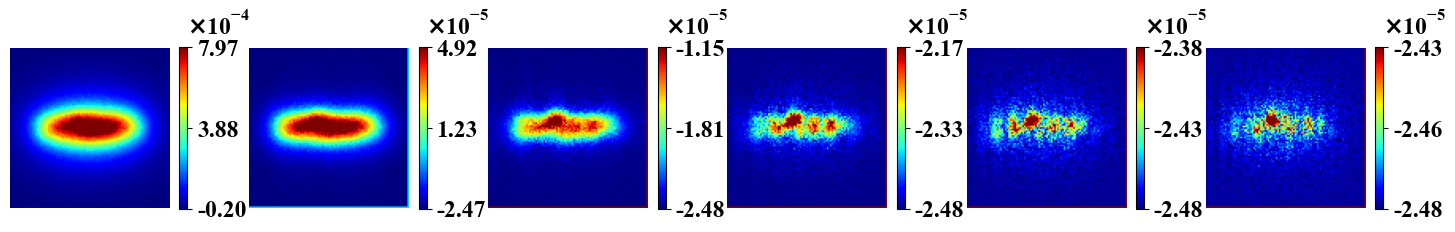

offset str:  $\times\mathdefault{10^{−4}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$


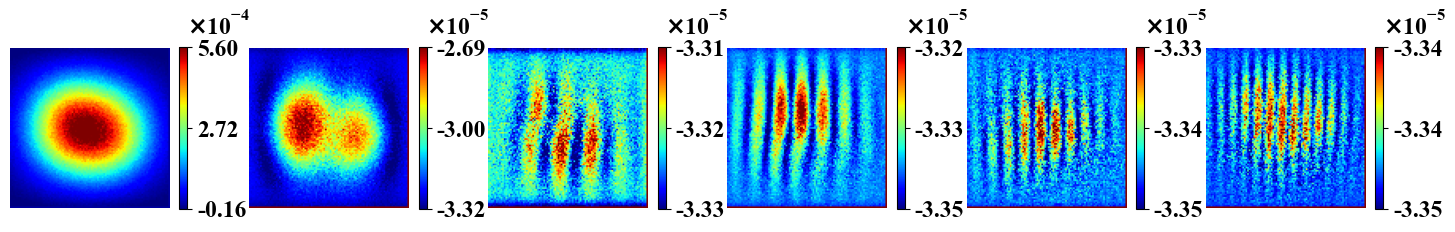

offset str:  $\times\mathdefault{10^{−4}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$


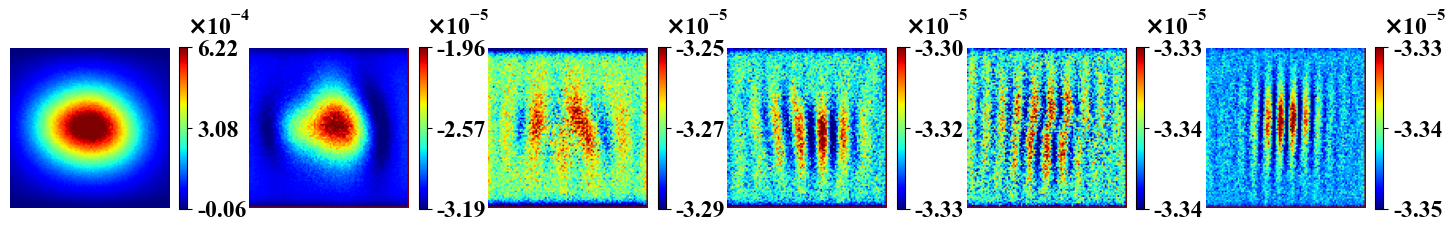

offset str:  $\times\mathdefault{10^{−4}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$


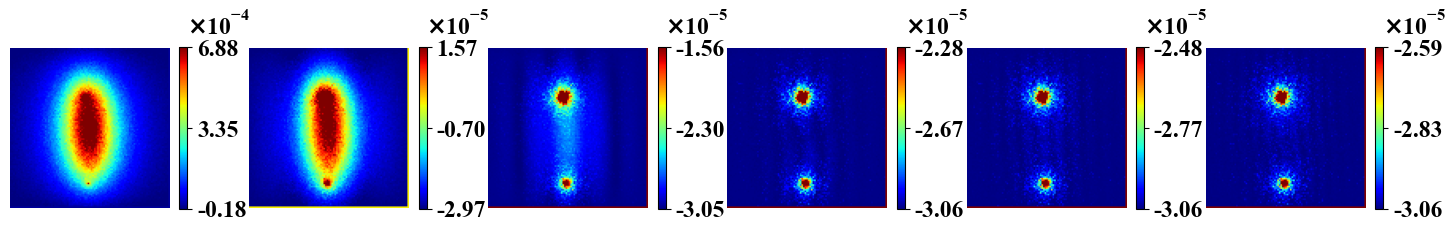

offset str:  $\times\mathdefault{10^{−4}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$
offset str:  $\times\mathdefault{10^{−5}}\mathdefault{}$


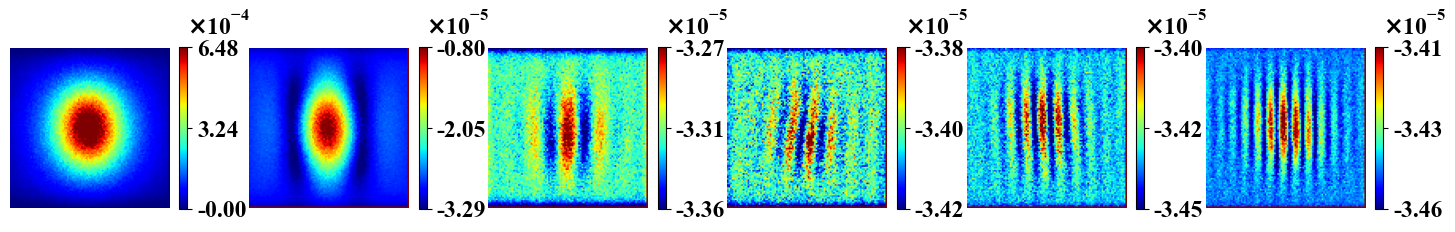

In [ ]:
#plots FL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

raw_FL = test.FL / (10**4)
save_fig = 0
save_path = os.path.join('./predictions/' + test.folder_name)

def format_ticks_with_shared_exponent(ticks):
    # Find max exponent among ticks
    exponents = [int(np.floor(np.log10(abs(t)))) if t != 0 else 0 for t in ticks]
    max_exp = max(exponents)
    
    # Format mantissas
    labels = []
    for t in ticks:
        mantissa = t / (10**max_exp)
        labels.append(f"{mantissa:.2f}")
    
    # Return labels and the shared exponent
    return labels


for x in range(test.FL.shape[0]):
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size
    fig.subplots_adjust(wspace=0.2)
    for i in range(6):
        ax = axes[i]
        img_data = np.squeeze(raw_FL[x, :, :, i])
        vmin = np.percentile(img_data, 2.5)
        vmax = np.percentile(img_data, 97.5)
        vmid = (vmin + vmax) / 2

        img = ax.imshow(img_data, vmin=vmin, vmax=vmax, cmap='jet')
        ax.axis('off')

        cbar = fig.colorbar(img, ax=ax, shrink=0.7)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((0, 0))
        cbar.formatter = formatter
        cbar.update_ticks()

        
        # Get the offset text string manually
        fig.canvas.draw_idle()   # Or fig.canvas.draw() if immediate

        offset_str = cbar.ax.yaxis.get_offset_text().get_text()
        # Hide the original offset text

        print("offset str: ",cbar.ax.yaxis.get_offset_text().get_text())
        cbar.ax.yaxis.offsetText.set_visible(False)


        # Manually add offset text at a custom position (x, y) in axes coords
        # Adjust these values to move the text where you want
        cbar.ax.text(
            0.95, 1.05,  # x, y coordinates in axes fraction (just right & above)
            offset_str,
            transform=cbar.ax.transAxes,
            fontsize=17,
            ha='left',
            va='bottom'
        )

        # Set colorbar ticks and tick size

        ticks = [vmin, vmid, vmax]
        cbar.set_ticks(ticks)

        # Manually set tick labels rounded to 1 decimal place as strings
        tick_labels = format_ticks_with_shared_exponent(ticks)
        #tick_labels = [format_ticks_with_shared_exponent(t) for t in ticks]
        cbar.set_ticklabels(tick_labels)
        cbar.set_ticks(ticks)
        cbar.set_ticklabels(tick_labels)
        cbar.ax.tick_params(labelsize=17)


 

    #optionally, save the figures
    if save_fig:
        plot_save_path_FL = save_path + '_depth_' + str(x) +'_FL.png'
        plt.savefig(plot_save_path_FL, dpi=100, bbox_inches='tight')

    #plt.tight_layout()
    plt.show()


In [ ]:
#plots OP
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Scale OP data for visualization
test.OP[:, :, :, 0] /= 10
save_fig = 1
save_path = os.path.join('./predictions/' + test.folder_name)

for x in range(test.RE.shape[0]):
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))  # Adjusted figsize for 2 plots

    for i in range(2):
        ax = axes[i]
        img_data = np.squeeze(test.OP[x, :, :, i])
        
        # Display image with 2.5–97.5 percentile range
        img = ax.imshow(
            img_data,
            vmin=np.percentile(img_data, 2.5),
            vmax=np.percentile(img_data, 97.5),
            cmap='jet'
        )
        ax.axis('off')

        # Use ScalarFormatter for clean scientific notation
        cbar = fig.colorbar(img, ax=ax, shrink=0.8)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-2, 2))  # Force scientific notation outside range
        cbar.formatter = formatter
        cbar.ax.yaxis.set_offset_position('left')  # Move exponent to top
        cbar.update_ticks()
        cbar.ax.tick_params(labelsize=10)

    if save_fig:
        plot_save_path_OP = save_path + '_depth_' + str(x) +'_OP.png'
        plt.savefig(plot_save_path_OP, dpi=100, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

# Scale back to original magnitude
test.OP[:, :, :, 0] *= 10


In [ ]:
test.modelD.summary()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# Scale DF data (if necessary — match OP logic)

save_fig = 0
save_path = os.path.join('./predictions/' + test.folder_name)

for x in range(test.DF.shape[0]):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))  # Single plot for DF

    img_data = np.squeeze(test.DF[x, :, :])
    
    # Display image with 2.5–97.5 percentile range for contrast enhancement
    img = ax.imshow(
        img_data,
        vmin=0 ,
        vmax=15,
        cmap='jet'
    )
    ax.axis('off')

    # Add colorbar with scientific formatting
    cbar = fig.colorbar(img, ax=ax, shrink=0.8)
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-2, 2))
    cbar.formatter = formatter
    cbar.ax.yaxis.set_offset_position('left')
    cbar.update_ticks()
    cbar.ax.tick_params(labelsize=10)

    if save_fig:
        plot_save_path_DF = save_path + '_depth_' + str(x) + '_DF.png'
        plt.savefig(plot_save_path_DF, dpi=100, bbox_inches='tight')

    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize fx as given
fx = [0, 0.05, 0.1, 0.15, 0.2, 0.25]

# Find the index where the maximum occurs in the last frame (i == test.FL.shape[0] - 1)
# test.FL has shape (n, m, p), where n is time, m is rows, and p is columns
last_frame = test.FL[-1]  # Get the last frame (2D array)
max_index = np.unravel_index(np.argmax(last_frame), last_frame.shape)  # Find the 2D index of the max value

# Now plot for each i, using the same max_index for each iteration
for i in range(test.FL.shape[0]):
    # Extract the data for the current iteration and the maximum index
    max_value = test.FL[i, max_index[0], max_index[1]]  # Use the max_index for the current frame
    plt.plot(fx, max_value)  # Plot using the maximum index for the current frame
    plt.ylabel('Max Fluorescence Intensity')
    plt.xlabel('Fx')
    plt.title(f'Tumour Max Intensity at pixel with max intensity for fx = 0')

plt.show()  # Display the plot after the loop finishes


In [ ]:
#analyze only the middle portion 
for i in range(test.FL.shape[0]):
    #for x in range(test.FL.shape[-1]):
    plt.plot(fx, np.mean(test.FL[i,40:60,40:60], axis = (0,1)))
    plt.ylabel('Mean Fluorescence Intensity')
    plt.xlabel('Fx')
    plt.title('Tumour 4 Mean Intensity')

In [ ]:
#analyze only the middle pixel 
for i in range(test.FL.shape[0]):
    #for x in range(test.FL.shape[-1]):
    plt.plot(fx, test.FL[i,50,50])
    plt.ylabel('Pixel Wise Intensity')
    plt.xlabel('Fx')
    plt.title('Pixel Wise Intensity')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to find the index of the minimum value in the matrix
def find_min_index(matrix):
    min_index_flat = np.argmin(matrix)  # Find the flat index of the minimum
    row, col = np.unravel_index(min_index_flat, matrix.shape)  # Convert to row, col
    return row, col

# Loop through the FL data (assuming test.FL and test.DF are 3D arrays)
for i in range(test.FL.shape[0]):
    DF = np.squeeze(test.DF[i])  # Remove single dimensions if necessary
    print("DF for index {}:".format(i), DF)
    
    # Find the row and column of the minimum value in DF
    row, col = find_min_index(DF)
    print(f"Minimum DF value at ({row}, {col}): {DF[row, col]}")
    plt.imshow(DF)
    
    # Plot the pixel intensity for the minimum DF pixel
    plt.plot(fx, test.FL[i, row, col])  # Plot intensity from the minimum DF pixel
    plt.ylabel('Pixel Wise Intensity')
    plt.xlabel('Fx')
    plt.title(f'Pixel Wise Intensity for Min DF at index {i}')
    plt.show()  # Display the plot


In [ ]:
#obtain the onion peeler images 


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

raw_FL = test.FL / (10**4)

for x in range(test.FL.shape[0]):
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size
    for i in range(raw_FL.shape[-1]):
        #if the first spatial frequency, plot normally 
        ax = axes[i]  # Access each axis

        if i == 5:
            img_data = np.squeeze(raw_FL[x, :, :, i])
        else:
            img_data = np.squeeze(raw_FL[x, :, :, i] - raw_FL[x, :, :, i + 1] )

        img = ax.imshow(
            img_data,
            vmin=np.percentile(img_data, 2.5),
            vmax=np.percentile(img_data, 97.5),
            cmap='jet'
        )
        ax.axis('off')  # Turn off both axes and ticks

        # Create a colorbar with compact scientific formatting
        cbar = fig.colorbar(img, ax=ax, shrink=0.8)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-2, 2))  # Forces scientific notation outside this range
        cbar.ax.yaxis.set_offset_position('left')  # Moves the offset label (e.g. ×10³) to the top
        cbar.formatter = formatter
        cbar.update_ticks()
        cbar.ax.tick_params(labelsize=6)

    plt.tight_layout()
    plt.show()




In [ ]:
#create x-y plot with min depth of all liquid phantoms 
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
#true_DF = np.array([[0, 2, 4, 6] for x in range(4)])
#pred_DF = np.array([[-0.10, 1.93, 3.51, 7.01], [0.29, 3.21, 4.70, 6.02], [0.37, 2.05, 3.31, 4.89], [0.28, 3.07, 4.23, 5.01]])

num_depth = 9
depths = [2,4,6,8]
true_DF =  []

for x in range(num_depth):
    for i in range(len(depths)):
        true_DF.append(depths[i])

true_DF = np.array(true_DF)

#pred_DF = np.array([0.79, 2.93, 6.65, 8.81, 0.31, 0.422, 3.20, 5.77, 0.64, 3.41, 6.50, 8.43, 0.53, 3.35, 6.45, 8.55, 0.78, 2.96, 3.21, 3.93, 6.41, 7.49, 9.31, 2.91, 3.44, 7.9])

#specify .txt file to extrac the min predictions 
with open("./predictions/all_pred.txt", "r") as file:
    pred_DF = np.array([float(line.strip()) for line in file])

#pred_DF = np.array([1.56, 3.56, 5.6, 7.52, 2.43, 3.83, 5.54, 6.78, 2.84, 4.71, 2.19, 8.61, 1.75, 3.25, 4.62, 8.44, 2.80, 4.72, 5.61, 7.43])


from sklearn.metrics import r2_score
print("R2: ", r2_score(true_DF, pred_DF))
print(np.mean(np.abs(true_DF - pred_DF)))
print(np.std(np.abs(true_DF - pred_DF)))

plt.scatter(true_DF,pred_DF, s= 20, color = ['red'])
plt.plot(plt.xlim([0, 10]), plt.ylim([0, 10]),color='b', linewidth=3, linestyle='dashed')


DF_min_classify = np.array(true_DF) < 5 
DFP_min_classify = np.array(pred_DF) < 5
        
failed_result = DF_min_classify != DFP_min_classify
failed_result = np.squeeze(failed_result)

#plt.scatter(true_DF[failed_result],pred_DF[failed_result], color = ['red'])
font = {'family': 'Times New Roman', 'weight': 'bold', 'size':20}
matplotlib.rc('font', **font)

plt.ylabel("Predicted Depth (mm)")
plt.xlabel("True Depth (mm)")
#plt.title("Minimum Margin Thickness Graph", pad = 10)
plt.tight_layout()
matplotlib.rc('font', **font)

In [ ]:
# Compute mean absolute error and standard deviation at each depth
unique_depths = np.unique(true_DF)
mean_errors = []
std_errors = []

for d in unique_depths:
    indices = np.where(true_DF == d)
    depth_errors = np.abs(true_DF[indices] - pred_DF[indices])
    mean_errors.append(np.mean(depth_errors))
    std_errors.append(np.std(depth_errors))

# Create bar graph with error bars
plt.figure()
plt.bar(
    [str(d) + " mm" for d in unique_depths], 
    mean_errors, 
    yerr=std_errors, 
    capsize=5, 
    color='skyblue', 
    edgecolor='black'
)
plt.ylabel("Mean Absolute Error (mm)")
plt.xlabel("True Depth")
plt.title("Prediction Error by Depth")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)




In [ ]:
from scipy.stats import ttest_ind

# Store errors for each depth
depth_errors_dict = {}

for d in unique_depths:
    indices = np.where(true_DF == d)
    depth_errors = np.abs(true_DF[indices] - pred_DF[indices])
    depth_errors_dict[d] = depth_errors


In [ ]:
from itertools import combinations

# Store results
ttest_results = []

for d1, d2 in combinations(unique_depths, 2):
    errors1 = depth_errors_dict[d1]
    errors2 = depth_errors_dict[d2]
    stat, p_val = ttest_ind(errors1, errors2, equal_var=False)  # Welch’s t-test is safer
    ttest_results.append({
        'depth_pair': (d1, d2),
        't_statistic': stat,
        'p_value': p_val
    })


In [ ]:
print("Pairwise t-tests between depth errors:")
for result in ttest_results:
    d1, d2 = result['depth_pair']
    p_val = result['p_value']
    significance = "✓" if p_val < 0.05 else "✗"
    print(f"{d1} mm vs {d2} mm: p = {p_val:.4f} {significance}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load predictions from file
with open("./predictions/all_pred.txt", "r") as file:
    pred_DF = np.array([float(line.strip()) for line in file])

# Prepare ground truth
num_depth = 9
depths = [2, 4, 6, 8]
num_cases = num_depth
true_DF = np.tile(depths, num_cases)  # shape: (num_cases * 4,)
true_DF = true_DF.reshape((num_cases, len(depths)))
pred_DF = pred_DF.reshape((num_cases, len(depths)))

# Compute absolute error
errors = np.abs(true_DF - pred_DF)

# Plot bar graph for each case
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axs = axs.flatten()

for i in range(num_cases):
    axs[i].bar([str(d) for d in depths], errors[i], color='skyblue', edgecolor='black')
    axs[i].set_ylim(0, np.max(errors) + 1)
    axs[i].set_title(f"Case {i+1}")
    axs[i].set_xlabel("Depth (mm)")
    axs[i].set_ylabel("Error (mm)")

plt.suptitle("Depth-wise Prediction Error for Each Case", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load predictions
with open("./predictions/all_pred.txt", "r") as file:
    pred_DF = np.array([float(line.strip()) for line in file])

# Prepare true depths
num_depth = 9
depths = [2, 4, 6, 8]
num_cases = num_depth
true_DF = np.tile(depths, num_cases).reshape((num_cases, len(depths)))
pred_DF = pred_DF.reshape((num_cases, len(depths)))

# Compute absolute error
errors = np.abs(true_DF - pred_DF)

# Compute mean and std for each case
mean_errors = np.mean(errors, axis=1)
std_errors = np.std(errors, axis=1)

# Plot mean errors with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_cases + 1), mean_errors, yerr=std_errors, capsize=5, 
        color='steelblue', edgecolor='black', error_kw={'elinewidth':1.5})
plt.xticks(range(1, num_cases + 1))
plt.xlabel("Case Number")
plt.ylabel("Mean Absolute Error (mm)")
plt.title("Mean Prediction Error for Each Case", fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize fx as given
fx = [1, 2, 3, 4, 5, 6]  # Placeholder, will be mapped to your custom labels

# Custom x-axis labels
custom_labels = [0, 0.0140, 0.0240, 0.0390, 0.068, 0.2]

# Find the index where the maximum occurs in the last frame (i == test.FL.shape[0] - 1)
# test.FL has shape (n, m, p), where n is time, m is rows, and p is columns
last_frame = test.FL[-1]  # Get the last frame (2D array)
max_index = np.unravel_index(np.argmax(last_frame), last_frame.shape)  # Find the 2D index of the max value

# Now plot for each i, using the same max_index for each iteration
for i in range(test.FL.shape[0]):
    # Extract the data for the current iteration and the maximum index
    max_value = test.FL[i, max_index[0], max_index[1]]  # Use the max_index for the current frame
    plt.plot(fx, max_value)  # Plot using the maximum index for the current frame
    plt.ylabel('Max Fluorescence Intensity')
    plt.xlabel('Fx')
    plt.title(f'Tumour Max Intensity at pixel with max intensity for fx = 0')

# Set custom labels for x-axis
plt.xticks(fx, custom_labels)

# Show the plot
plt.show()  # Display the plot after the loop finishes


<unknown>:487: SyntaxWarning: invalid escape sequence '\L'
<unknown>:487: SyntaxWarning: invalid escape sequence '\L'


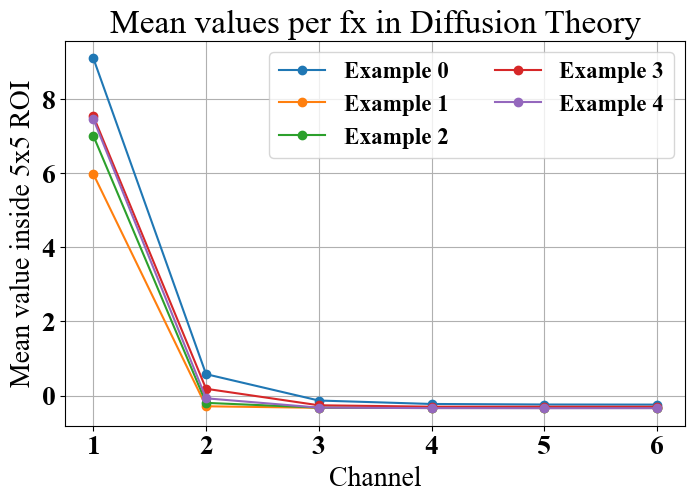

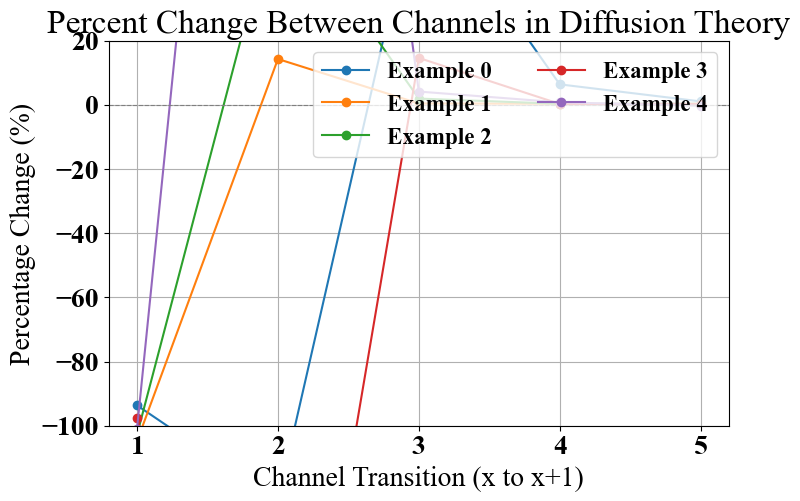

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def mean_roi_per_channel_np(fx, roi_size=5):
    B, H, W, C = fx.shape
    center_h = H // 2
    center_w = W // 2
    half_roi = roi_size // 2

    top = center_h - half_roi
    bottom = center_h + half_roi + 1
    left = center_w - half_roi
    right = center_w + half_roi + 1

    roi = fx[:, top:bottom, left:right, :]  # (B, roi_size, roi_size, C)
    mean_per_channel = roi.mean(axis=(1, 2))  # (B, C)
    return mean_per_channel

# Example data
B = 12
H, W, C = 64, 64, 6
fx = np.random.randn(B, H, W, C)

means = mean_roi_per_channel_np(test.FL, roi_size=5)  # shape (B, 6)

# Define groups (inclusive ranges)
groups = {
    'Diffusion Theory': slice(0, 5),
    #'MCX': slice(4, 8),
    #'SFDI': slice(8, 12),
}

channels = np.arange(1, C+1)

for group_name, slc in groups.items():
    plt.figure(figsize=(8, 5))
    for i in range(slc.start, slc.stop):
        plt.plot(channels, means[i], marker='o', label=f'Example {i}')
    plt.xlabel('Channel')
    plt.ylabel('Mean value inside 5x5 ROI')
    plt.title(f'Mean values per fx in {group_name}')
    plt.xticks(channels)
    plt.legend(loc='upper right', fontsize='small', ncol=2)
    plt.grid(True)
    plt.show()

def compute_percentage_change(mean_values):
    """
    Compute percentage change from channel x to channel x+1.
    
    Args:
      mean_values: numpy array of shape (B, C) – mean per channel per test case
    
    Returns:
      pct_change: numpy array of shape (B, C-1) – % change between adjacent channels
    """
    prev = mean_values[:, :-1]      # channel x
    next_ = mean_values[:, 1:]      # channel x+1

    # Avoid divide by zero — add small epsilon
    eps = 1e-8
    pct_change = ((next_ - prev) / (prev + eps)) * 100
    return pct_change

# Using `means` from the previous step
pct_changes = compute_percentage_change(means)  # shape: (B, 5) if C=6

# Plot % change for each group
channels = np.arange(1, means.shape[1])  # channel pairs: (1→2), (2→3), ...

for group_name, slc in groups.items():
    plt.figure(figsize=(8, 5))
    for i in range(slc.start, slc.stop):
        plt.plot(channels, pct_changes[i], marker='o', label=f'Example {i}')
    plt.xlabel('Channel Transition (x to x+1)')
    plt.ylabel('Percentage Change (%)')
    plt.title(f'Percent Change Between Channels in {group_name}')
    plt.xticks(channels)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend(loc='upper right', fontsize='small', ncol=2)
    plt.ylim(-100, 20)
    plt.grid(True)

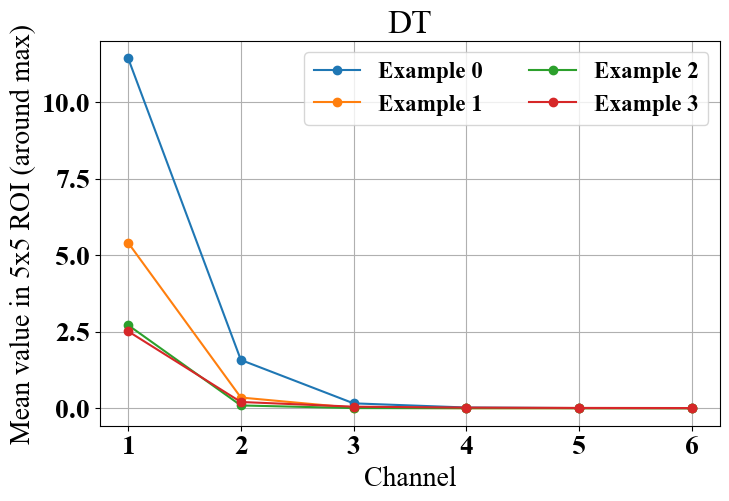

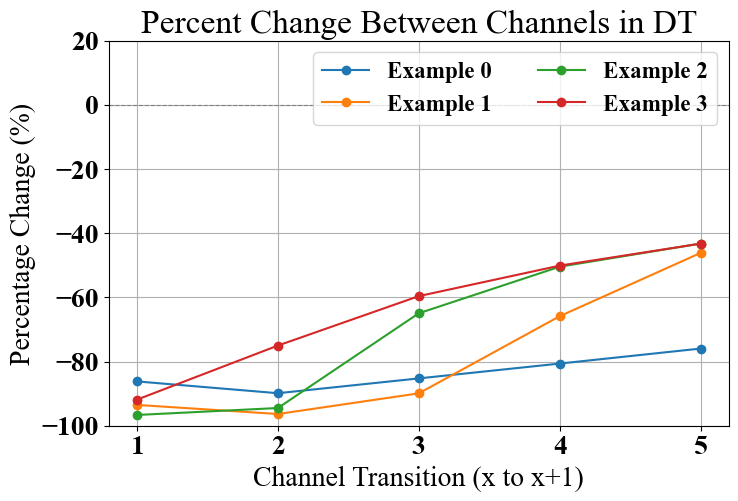

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def mean_roi_around_max_np(fx, roi_size=5):
    """
    Extracts 5x5 ROI around the max intensity point (across all channels)
    and computes mean per channel for each example.
    
    Args:
      fx: numpy array of shape (B, H, W, C)
      roi_size: size of the square ROI (default: 5)
    
    Returns:
      mean_per_channel: numpy array of shape (B, C)
    """
    B, H, W, C = fx.shape
    half = roi_size // 2
    means = np.zeros((B, C))

    for i in range(B):
        # Find (h, w) location of max value across all channels
        max_idx = np.unravel_index(np.argmax(fx[i], axis=None), fx[i].shape[:3])
        h, w = max_idx[0], max_idx[1]

        # Calculate safe ROI bounds
        top = max(0, h - half)
        bottom = min(H, h + half + 1)
        left = max(0, w - half)
        right = min(W, w + half + 1)

        # Extract ROI and compute mean per channel
        roi = fx[i, top:bottom, left:right, :]  # shape: (roi_h, roi_w, C)
        means[i] = roi.mean(axis=(0, 1))        # mean over spatial dims

    return means

# Example data
B = 12
H, W, C = 64, 64, 6
fx = np.random.randn(B, H, W, C)

means = mean_roi_around_max_np(test.FL, roi_size=5)  # shape (B, C)

# Define groups
groups = {
    'DT': slice(0, 4),
    #'MCX': slice(4, 8),
    #'SFDI': slice(8, 12),
}

channels = np.arange(1, C + 1)

# Plot for each group
for group_name, slc in groups.items():
    plt.figure(figsize=(8, 5))
    for i in range(slc.start, slc.stop):
        plt.plot(channels, means[i], marker='o', label=f'Example {i}')
    plt.xlabel('Channel')
    plt.ylabel('Mean value in 5x5 ROI (around max)')
    plt.title(f'{group_name}')
    plt.xticks(channels)
    plt.legend(loc='upper right', fontsize='small', ncol=2)
    plt.grid(True)
    plt.show()


def compute_percentage_change(mean_values):
    """
    Compute percentage change from channel x to channel x+1.
    
    Args:
      mean_values: numpy array of shape (B, C) – mean per channel per test case
    
    Returns:
      pct_change: numpy array of shape (B, C-1) – % change between adjacent channels
    """
    prev = mean_values[:, :-1]      # channel x
    next_ = mean_values[:, 1:]      # channel x+1

    # Avoid divide by zero — add small epsilon
    eps = 1e-8
    pct_change = ((next_ - prev) / (prev + eps)) * 100
    return pct_change

# Using `means` from the previous step
pct_changes = compute_percentage_change(means)  # shape: (B, 5) if C=6

# Plot % change for each group
channels = np.arange(1, means.shape[1])  # channel pairs: (1→2), (2→3), ...

for group_name, slc in groups.items():
    plt.figure(figsize=(8, 5))
    for i in range(slc.start, slc.stop):
        plt.plot(channels, pct_changes[i], marker='o', label=f'Example {i}')
    plt.xlabel('Channel Transition (x to x+1)')
    plt.ylabel('Percentage Change (%)')
    plt.title(f'Percent Change Between Channels in {group_name}')
    plt.xticks(channels)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend(loc='upper right', fontsize='small', ncol=2)
    plt.ylim(-100, 20)
    plt.grid(True)
    plt.show()
